# Excercise 2a: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

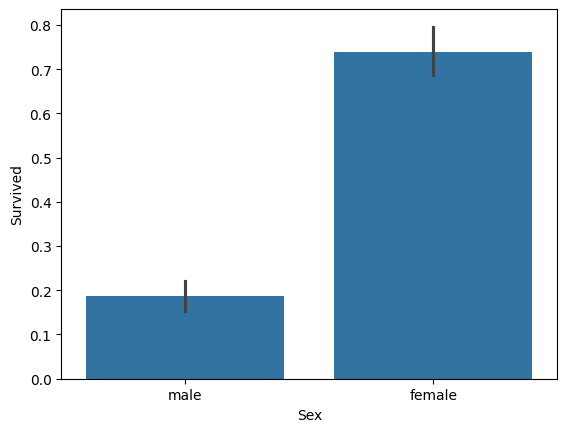

In [4]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes.

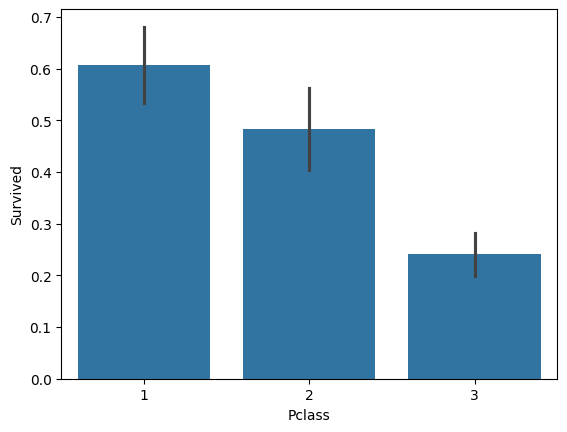

In [5]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Quite yes - if C-embarked yes, if S or Q its quite similar.

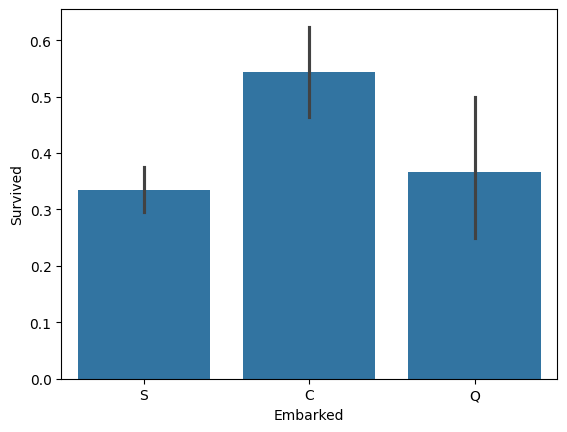

In [6]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Embarked', y='Survived', data=data)
plt.show()

# Question 3: How is age related to survival?

Answer: From the graphic bellow (orange), we can see that childrens, specially youngs (Age < 13) have a bigger rate of survival. From the linear regression at order 1 (blue), we see that older people have a lower survival probability. However, it is not much related then (violin plot).

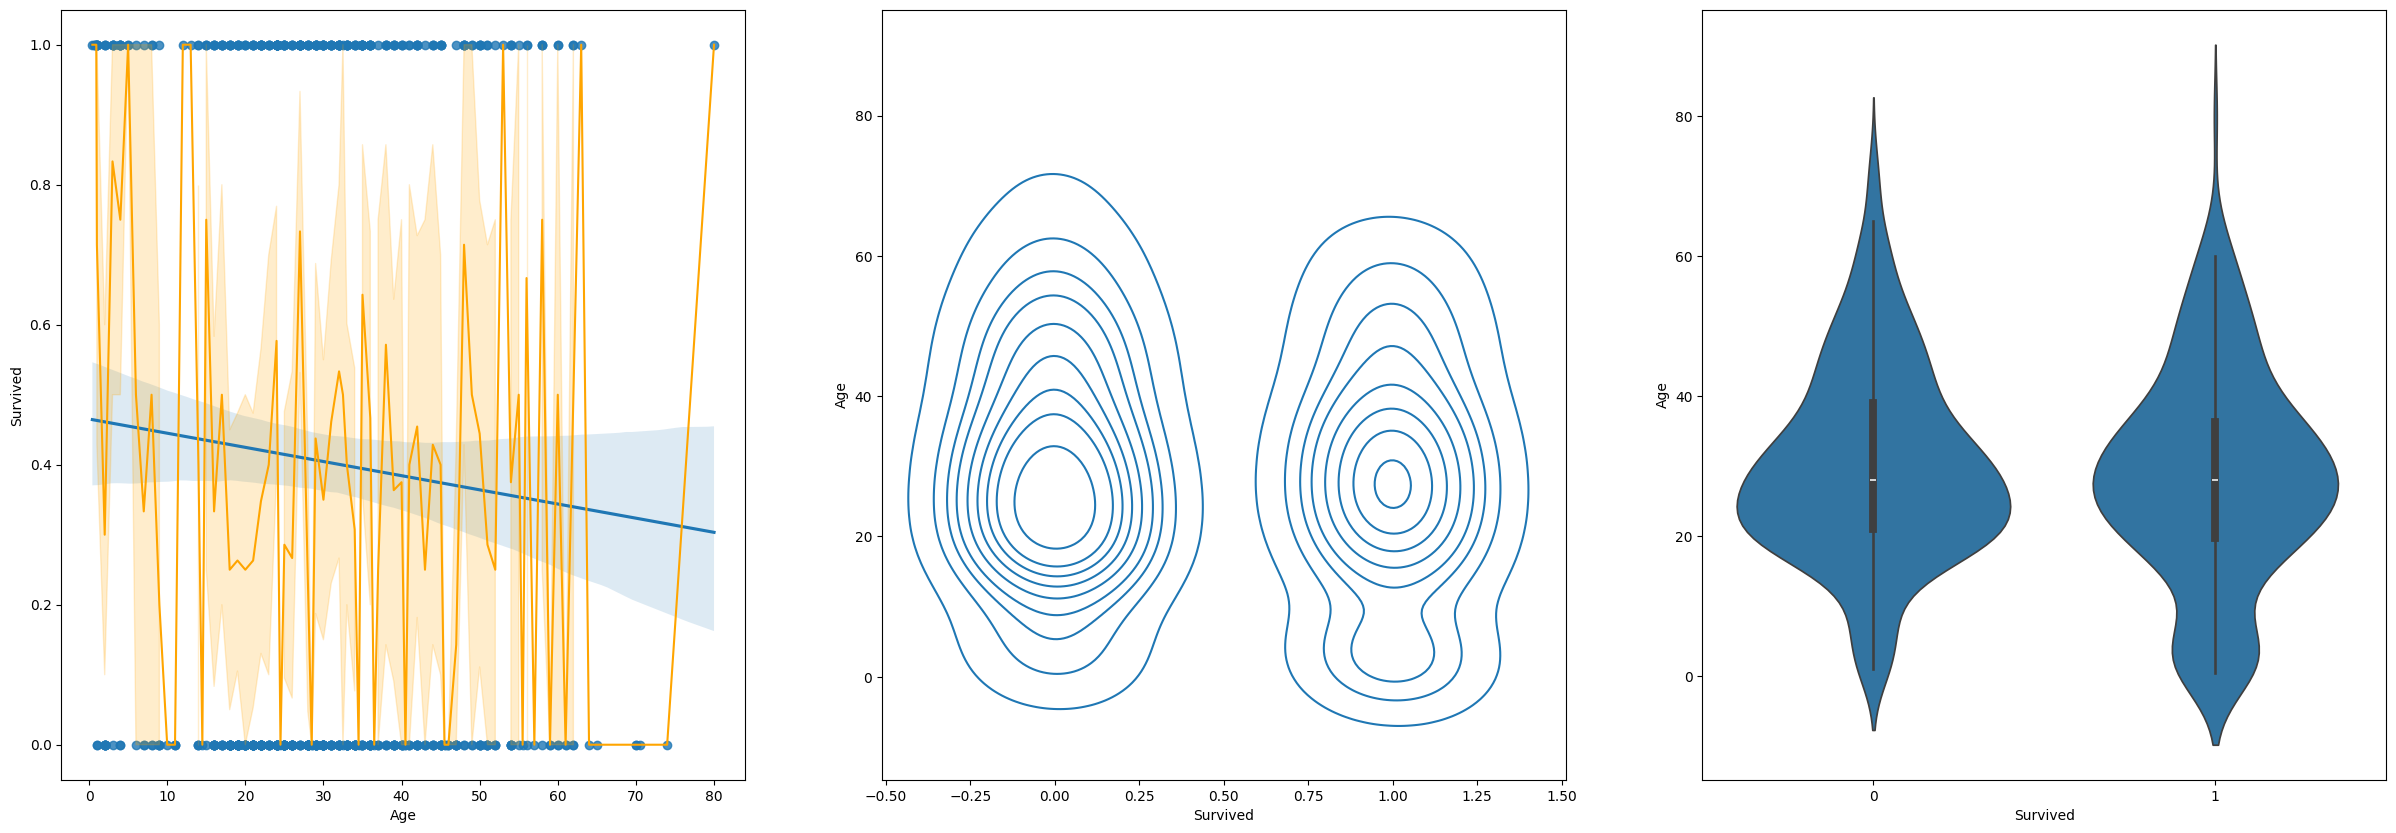

In [7]:
# Show the relevant statistics or visualization(s) to support your answer

f, axes = plt.subplots(1, 3, figsize=(30, 10))

sns.regplot(x='Age', y='Survived', data=data, fit_reg=True, ax=axes[0])
sns.lineplot(x='Age', y='Survived', data=data, color="orange", ax=axes[0])
sns.kdeplot(x='Survived', y='Age', data=data, ax=axes[1])
sns.violinplot(x='Survived', y='Age', data=data, ax=axes[2])
plt.show()

# Question 4: Does family size somehow affect the survival rate?

Answer: From the graphs on the left, it seems that the survival rate decrease when the number of siblings/spouses aboard the Titanic (SibSip), except when someone has none of them.

<Axes: xlabel='Parch', ylabel='Survived'>

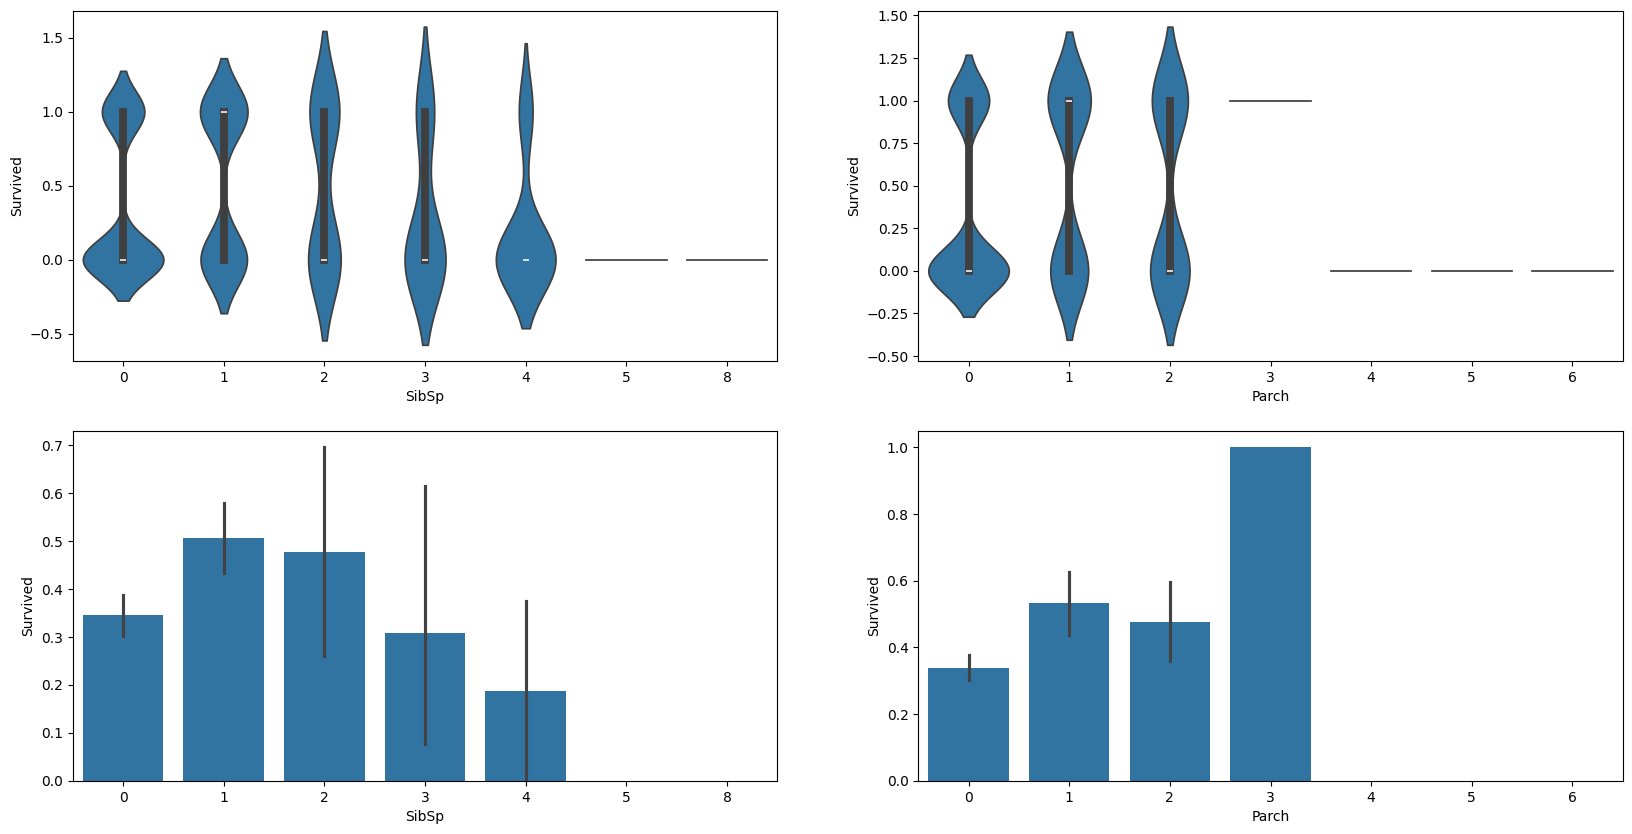

In [8]:
# Show the relevant statistics or visualization(s) to support your answer
f, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.violinplot(x='SibSp', y='Survived', data=data, ax=axes[0][0])
sns.violinplot(x='Parch', y='Survived', data=data, ax=axes[0][1])
sns.barplot(x='SibSp', y='Survived', data=data, ax=axes[1][0])
sns.barplot(x='Parch', y='Survived', data=data, ax=axes[1][1])

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: Seems to be true. The graph bellow shows that if someone has a different status than the common ones (Mr, Mrs, Miss), that person has higher probability to survive.

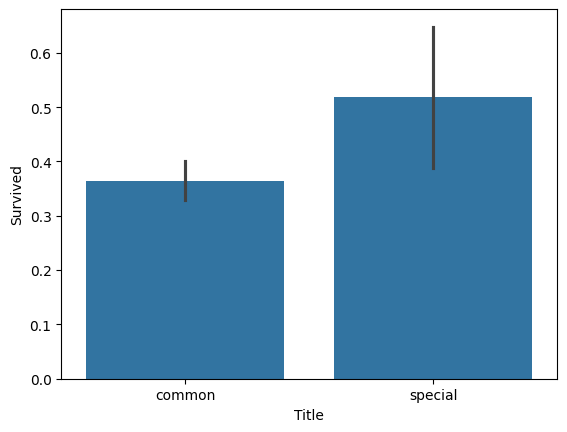

In [9]:
common_titles = ["Mr", "Mrs", "Miss"]

data['Title'] = data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).apply(lambda x: 'common' if x in common_titles else 'special')

sns.barplot(x='Title', y='Survived', data=data)
plt.show()
